# 3. Explore the data

Visually explore the data to see if we can confirm some of our initial hypotheses as well as make new hypothesis about the problem we are trying to solve.

For this we will start by loading the data and understanding the data structure of the dataframe we have.

In [169]:
import pandas as pd
prices_df=pd.read_excel('market_prices.xlsx')
#prices_df.drop('Product',axis=1,inplace=True)
prices_df.tail()


,Market,Product,Country,Date,Retail,Wholesale
3590,Eldoret,Maize,Kenya,2017-07-03,4500,4320
3591,Kisumu,Maize,Kenya,2017-07-03,5850,5400
3592,Mbale,Maize,Uganda,2017-07-03,2852,2334
3593,Dodoma,Maize,Tanzania,2017-07-03,0,2185
3594,Kasese,Maize,Uganda,2017-07-03,3622,3363


In [5]:
prices_df.shape

(3595, 6)

### What is the Average price of maize in Kenya compared to other countries?

In [9]:
prices_avg= prices_df.groupby(['Country']).mean()
prices_avg

,Retail,Wholesale
Country,,
Burundi,6545.318966,6069.428161
Kenya,3856.791241,3254.802920
Rwanda,4393.394022,3773.228261
South Sudan,5947.805556,4083.333333
Tanzania,2548.229050,2323.270019
Uganda,2622.790902,2166.325619


### What is the average price of maize in the different listed markets in Kenya

In [19]:
kenya=prices_df[prices_df.Country=="Kenya"]
Kenya_Market=kenya.groupby(['Market']).mean()
Kenya_Market

,Retail,Wholesale
Market,,
Eldoret,3361.223301,3089.563107
Kisumu,4090.959184,3647.663265
Machakos,4319.565217,3830.739130
Makueni,3757.934211,3230.171053
Meru,3029.722222,2781.333333
Mombasa,4670.113043,3269.982609
Nairobi,4576.406250,3872.958333
Nakuru,3104.238095,2643.714286


# Visual exploration of prices comparisons in kenya

In [31]:
kenya.groupby(['Market']).Retail.mean()



Market
Eldoret     3361.223301
Kisumu      4090.959184
Machakos    4319.565217
Makueni     3757.934211
Meru        3029.722222
Mombasa     4670.113043
Nairobi     4576.406250
Nakuru      3104.238095
Name: Retail, dtype: float64

In [36]:
kenya.groupby(['Market']).Wholesale.mean()

Market
Eldoret     3089.563107
Kisumu      3647.663265
Machakos    3830.739130
Makueni     3230.171053
Meru        2781.333333
Mombasa     3269.982609
Nairobi     3872.958333
Nakuru      2643.714286
Name: Wholesale, dtype: float64

In [33]:
# To create a dataframe  for retail prices 

Kenya_Retail=kenya.groupby(['Market'], as_index=False).Retail.mean()
Kenya_Retail

,Market,Retail
0,Eldoret,3361.223301
1,Kisumu,4090.959184
2,Machakos,4319.565217
3,Makueni,3757.934211
4,Meru,3029.722222
5,Mombasa,4670.113043
6,Nairobi,4576.406250
7,Nakuru,3104.238095


In [37]:
# To create a dataframe  for Wholesale prices 

Kenya_Wholesale=kenya.groupby(['Market'], as_index=False).Wholesale.mean()
Kenya_Wholesale

,Market,Wholesale
0,Eldoret,3089.563107
1,Kisumu,3647.663265
2,Machakos,3830.739130
3,Makueni,3230.171053
4,Meru,2781.333333
5,Mombasa,3269.982609
6,Nairobi,3872.958333
7,Nakuru,2643.714286


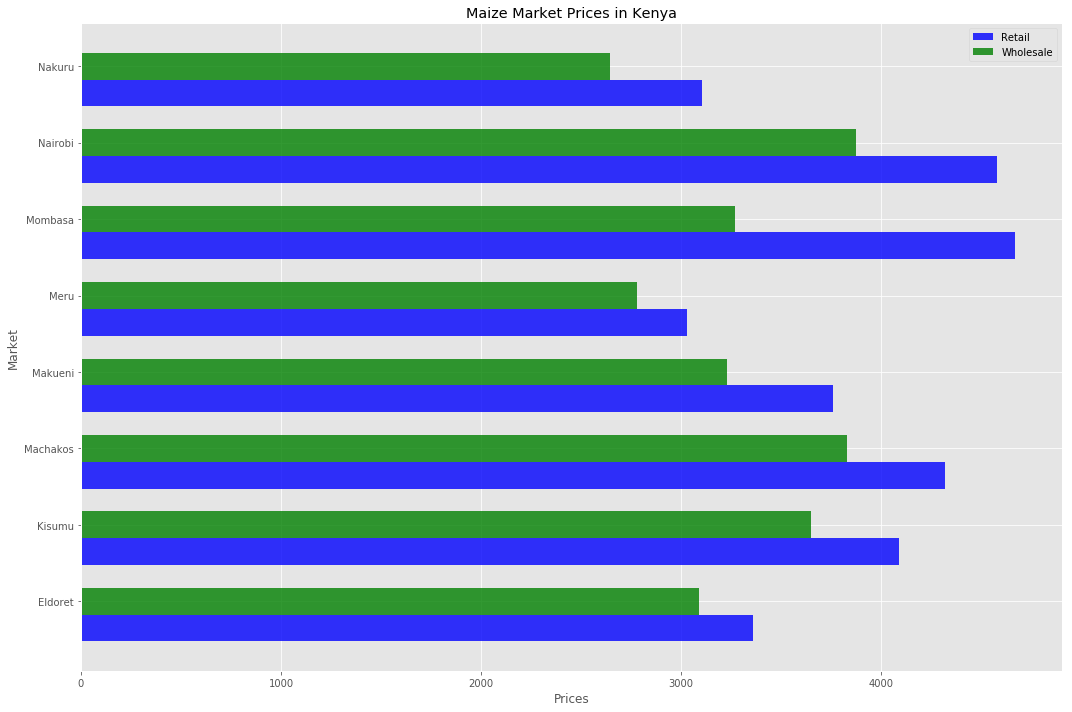

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 10)
import numpy as np

n_groups=8
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.barh(index, Kenya_Retail.Retail, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Retail')
 
rects2 = plt.barh(index + bar_width, Kenya_Wholesale.Wholesale, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Wholesale')
 
plt.xlabel('Prices')
plt.ylabel('Market')
plt.title('Maize Market Prices in Kenya')
plt.yticks(index + bar_width, ('Eldoret', 'Kisumu' , 'Machakos' , 'Makueni' , 'Meru', 'Mombasa', 'Nairobi' , 'Nakuru'))
plt.legend()
 
plt.tight_layout()
plt.show()


## Visual exploration of prices comparison in East Africa

In [59]:
Wholesale_avg= prices_df.groupby(['Country'], as_index=False).Wholesale.mean()
Wholesale_avg


,Country,Wholesale
0,Burundi,6069.428161
1,Kenya,3254.802920
2,Rwanda,3773.228261
3,South Sudan,4083.333333
4,Tanzania,2323.270019
5,Uganda,2166.325619


In [58]:
Retail_avg= prices_df.groupby(['Country'], as_index=False).Retail.mean()
Retail_avg

,Country,Retail
0,Burundi,6545.318966
1,Kenya,3856.791241
2,Rwanda,4393.394022
3,South Sudan,5947.805556
4,Tanzania,2548.229050
5,Uganda,2622.790902


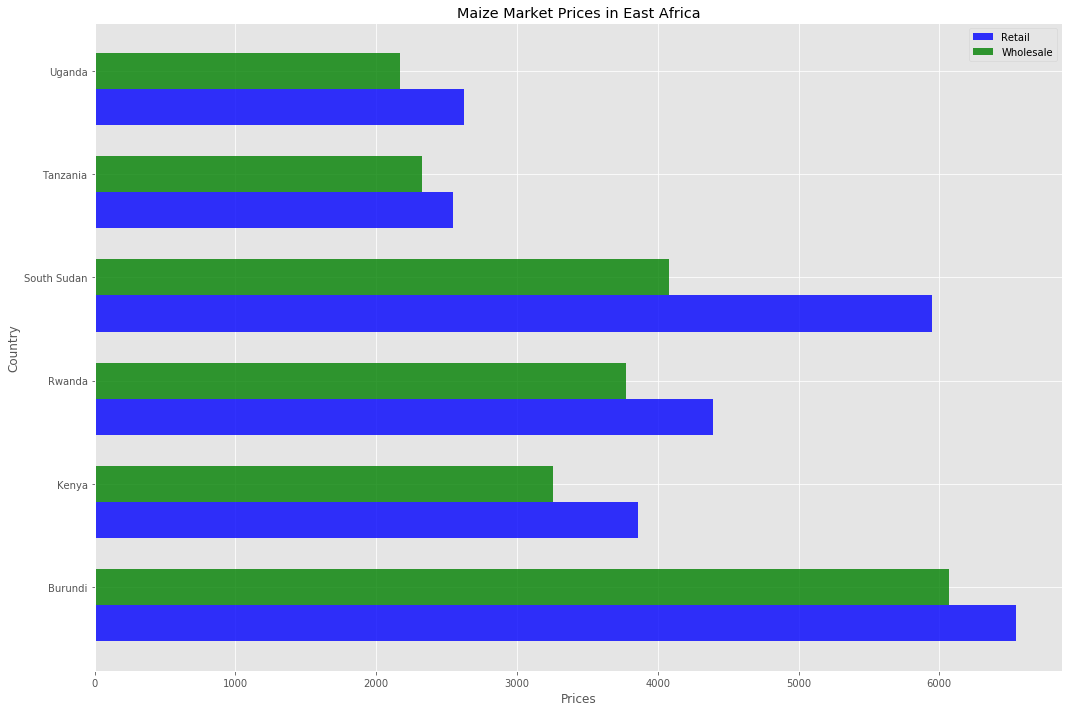

In [148]:
n_groups=6
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.barh(index, Retail_avg.Retail, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Retail')
 
rects2 = plt.barh(index + bar_width, Wholesale_avg.Wholesale, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Wholesale')
 
plt.xlabel('Prices')
plt.ylabel('Country')
plt.title('Maize Market Prices in East Africa')
plt.yticks(index + bar_width, ('Burundi', 'Kenya' , 'Rwanda' , 'South Sudan' , 'Tanzania', 'Uganda'))
plt.legend()
 
plt.tight_layout()
plt.show()


Text(0.5,1,'Time Series of the Maize Retail Prices in East Africa')

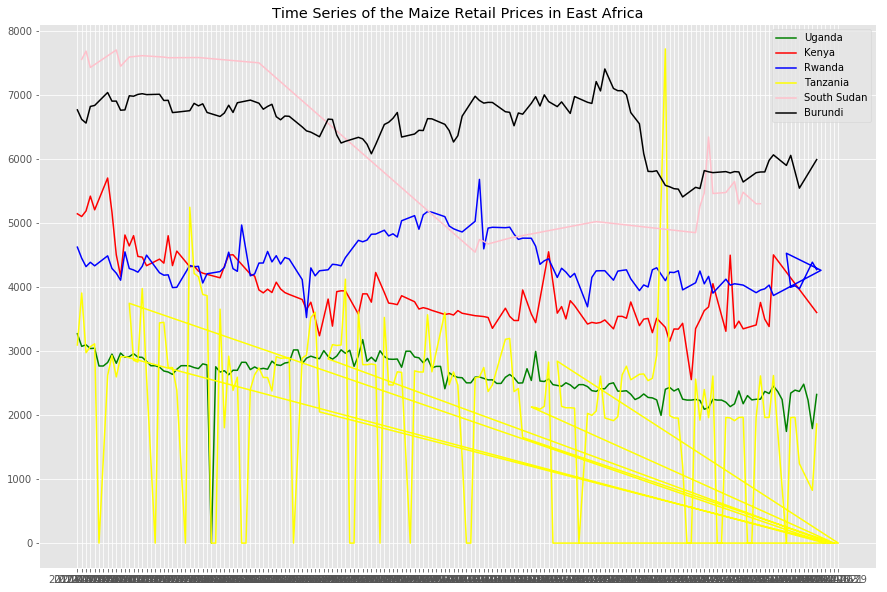

In [121]:
prices_df

Retail_sum=prices_df.groupby(['Date','Country'], as_index=False).Retail.mean()
KE=Retail_sum[Retail_sum['Country']=='Kenya']
RW=Retail_sum[Retail_sum['Country']=='Rwanda']
TZ=Retail_sum[Retail_sum['Country']=='Tanzania']
UG=Retail_sum[Retail_sum['Country']=='Uganda']
SS=Retail_sum[Retail_sum['Country']=='South Sudan']
BR=Retail_sum[Retail_sum['Country']=='Burundi']

fig, ax1 = plt.subplots()
ax1.plot(UG['Date'], UG['Retail'],color='green',label="Uganda")
ax1.plot(KE['Date'], KE['Retail'],color='red',label="Kenya")
ax1.plot(RW['Date'], RW['Retail'],color='blue',label="Rwanda")
ax1.plot(TZ['Date'], TZ['Retail'],color='yellow',label="Tanzania")
ax1.plot(SS['Date'], SS['Retail'],color='pink',label="South Sudan")
ax1.plot(BR['Date'], BR['Retail'],color='black',label="Burundi")

ax1.legend(loc='upper right')
ax1.set_title("Time Series of the Maize Retail Prices in East Africa")




## Time Series of prices in Kenya Markets (Retail)
Most of the Markets are prices on some days.To handle this, I interpolated the data

In [248]:
KER=kenya.groupby(['Date', 'Market','Retail']).size().reset_index()
KSM=KER[KER['Market']=='Kisumu']
NRB=KER[KER['Market']=='Nairobi']
MBS=KER[KER['Market']=='Mombasa']






In [249]:
KSM.set_index('Date', inplace=True)
NRB.set_index('Date', inplace=True)
MBS.set_index('Date', inplace=True)

In [250]:
idx = pd.date_range('2017-07-03', '2018-01-02')
#make date the index 
KSM.index = pd.DatetimeIndex(KSM.index)

# fill all the missing values with 0
KSM= KSM.reindex(idx, fill_value=0)

KSM.head()

#Nairobi

NRB.index = pd.DatetimeIndex(NRB.index)

# fill all the missing values with 0
NRB= NRB.reindex(idx, fill_value=0)

NRB.head()


#Mombasa

MBS.index = pd.DatetimeIndex(MBS.index)

# fill all the missing values with 0
MBS= MBS.reindex(idx, fill_value=0)

MBS.head()

,Market,Retail,0
2017-07-03,Mombasa,5400,1
2017-07-04,Mombasa,5282,1
2017-07-05,Mombasa,5507,1
2017-07-06,Mombasa,5399,1
2017-07-07,Mombasa,5402,1


In [251]:
KSM[KSM['Retail']==0]=None
KSM.head()
#Nairobi

NRB[NRB['Retail']==0]=None
NRB.head()

MBS[MBS['Retail']==0]=None
MBS.head()

,Market,Retail,0
2017-07-03,Mombasa,5400.0,1.0
2017-07-04,Mombasa,5282.0,1.0
2017-07-05,Mombasa,5507.0,1.0
2017-07-06,Mombasa,5399.0,1.0
2017-07-07,Mombasa,5402.0,1.0


In [252]:
#drop the market column
KSM.drop('Market', axis=1, inplace=True)
NRB.drop('Market', axis=1, inplace=True)
MBS.drop('Market', axis=1, inplace=True)

In [253]:
#drop the column 0
KSM.drop(0, axis=1, inplace=True)
NRB.drop(0, axis=1, inplace=True)
MBS.drop(0, axis=1, inplace=True)


In [228]:
KSM.head()


,Retail
2017-07-03,5850.0
2017-07-04,5850.0
2017-07-05,5850.0
2017-07-06,5850.0
2017-07-07,5850.0


In [255]:
KSM=KSM.interpolate()
NRB=NRB.interpolate()
MBS=MBS.interpolate()

Text(0.5,1,'Time Series of the Maize Retail Prices in Kenya')

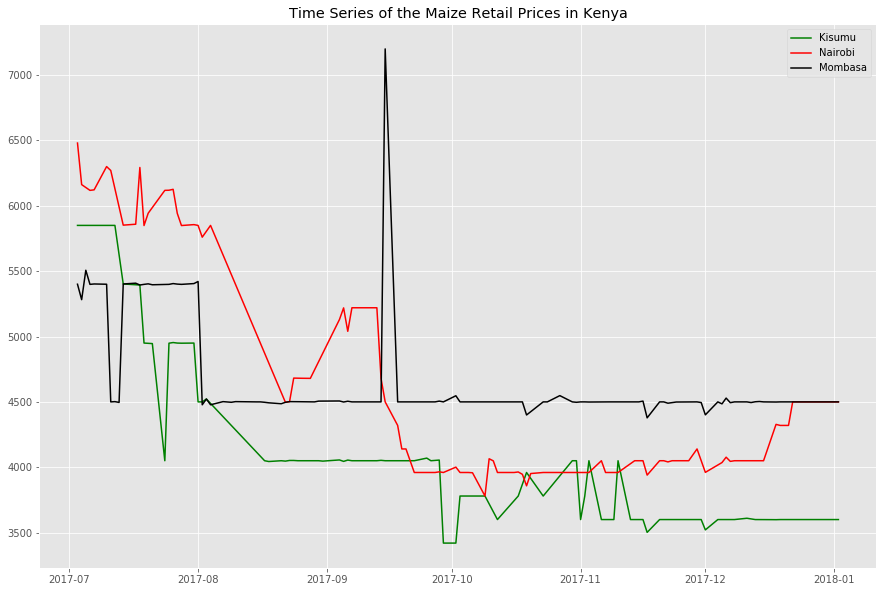

In [256]:
fig, ax2 = plt.subplots()
ax2.plot(KSM.index, KSM['Retail'],color='green',label="Kisumu")
ax2.plot(NRB.index, NRB['Retail'],color='red',label="Nairobi")
ax2.plot(MBS.index, MBS['Retail'],color='black',label="Mombasa")


ax2.legend(loc='upper right')
ax2.set_title("Time Series of the Maize Retail Prices in Kenya")